<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Merge the train and test data and let them go through the data transform together and split later when needed to test 

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-11-04 14:15:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-11-04 14:15:00 (13.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-04 14:15:09--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-11-04 14:15:10 (377 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Data From CSV File  

In [5]:
train_df = pd.read_csv('loan_train.csv')
train_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
test_df = pd.read_csv('loan_test.csv')
test_df.shape

(54, 10)

In [7]:
train_df['flag']= 'Train'
test_df['flag']='Test'
df = train_df.append(test_df)
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,flag
49,348,348,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male,Test
50,349,349,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male,Test
51,369,369,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male,Test
52,370,370,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male,Test
53,396,396,COLLECTION,1000,30,9/12/2016,10/11/2016,33,High School or Below,male,Test


In [8]:
df.shape

(400, 11)

### Convert to date time object 

In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,flag
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,Train
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,Train
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,Train
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,Train
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,Train


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [10]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [11]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.10.16 |                0         131 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    certifi-2019.9.11          |           py36_0         154 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    ca-certificates: 2019.8.28-0       --> 2019.10.16-0     anaconda
    certifi:         2019.9.11-py36_0  --> 2019.9.11-py36_0 anaconda
    openssl:         1.1.1d-h7b6447c_2 --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0     

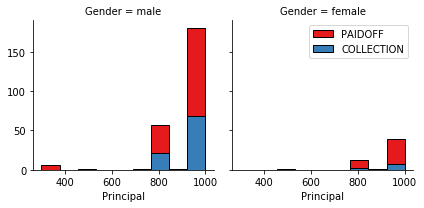

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

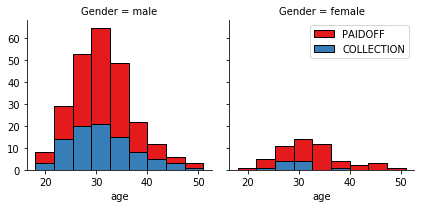

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

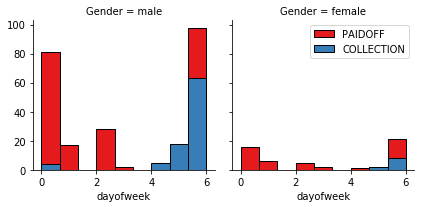

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,flag,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,Train,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,Train,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,Train,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,Train,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,Train,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,flag,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,Train,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,Train,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,Train,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,Train,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,Train,4,1


## One Hot Encoding  
#### How about education?

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
Feature = df[['Principal','terms','age','Gender','weekend','flag','loan_status']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,flag,loan_status,Bechalor,High School or Below,college
0,1000,30,45,0,0,Train,PAIDOFF,0,1,0
1,1000,30,33,1,0,Train,PAIDOFF,1,0,0
2,1000,15,27,0,0,Train,PAIDOFF,0,0,1
3,1000,30,28,1,1,Train,PAIDOFF,0,0,1
4,1000,30,29,0,1,Train,PAIDOFF,0,0,1


### Feature selection

Lets defind feature sets, X:

In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,flag,loan_status,Bechalor,High School or Below,college
0,1000,30,45,0,0,Train,PAIDOFF,0,1,0
1,1000,30,33,1,0,Train,PAIDOFF,1,0,0
2,1000,15,27,0,0,Train,PAIDOFF,0,0,1
3,1000,30,28,1,1,Train,PAIDOFF,0,0,1
4,1000,30,29,0,1,Train,PAIDOFF,0,0,1


What are our lables?

In [21]:
#create train dataset and y label
X_train=X.where(X.flag=='Train').dropna()
y_train = X_train['loan_status'].values
X_train1 = X_train[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]
#y_train[200:276]


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [22]:
X_train2= preprocessing.StandardScaler().fit(X_train1).transform(X_train1)
X_train2[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [23]:
#split the data into train and test and print their dimensions
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X_train2,y_train,test_size=0.2,random_state=4)
print("train_X",train_X.shape)
print("test_X",test_X.shape)
print("train_y",train_y.shape)
print("test_y",test_y.shape)


train_X (276, 8)
test_X (70, 8)
train_y (276,)
test_y (70,)


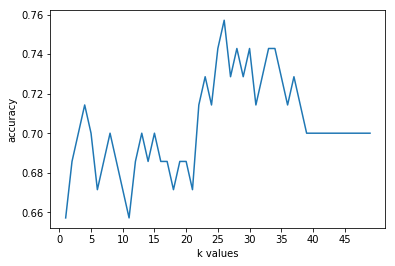

In [138]:
#import classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

#find out the best suitable K by checking the accuracy while iterating through k from 1 to 50
from sklearn import metrics
import numpy as np

k_range=range(1,50)
#error=[]
scores={}
score_list=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X,train_y)
    y_pred=knn.predict(test_X)
    #error.append(np.mean(y_pred != test_y))
    scores[k]=metrics.accuracy_score(test_y,y_pred)
    score_list.append(metrics.accuracy_score(test_y,y_pred))

#lets plot the k and accuracy
plt.plot(k_range,score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 50, 5)) 
plt.show()




In [144]:
#From the graph above its looks like the accuracy is max at k=7
knn= KNeighborsClassifier(n_neighbors=25)
knn.fit(train_X,train_y)
y_pred=knn.predict(test_X)
y_pred
#train_y
print(metrics.accuracy_score(test_y, y_pred))


0.7428571428571429


# Decision Tree

In [162]:
train_X,test_X,train_y,test_y = train_test_split(X_train2,y_train,test_size=0.2,random_state=5)
# import the regressor 
from sklearn.tree import DecisionTreeClassifier      
    
#create a regressor object 
dt = DecisionTreeClassifier( max_depth = 5)  
dt.fit(train_X, train_y)
y_pred_dt=dt.predict(test_X)
y_pred_dt
print(metrics.accuracy_score(test_y, y_pred_dt))

0.7


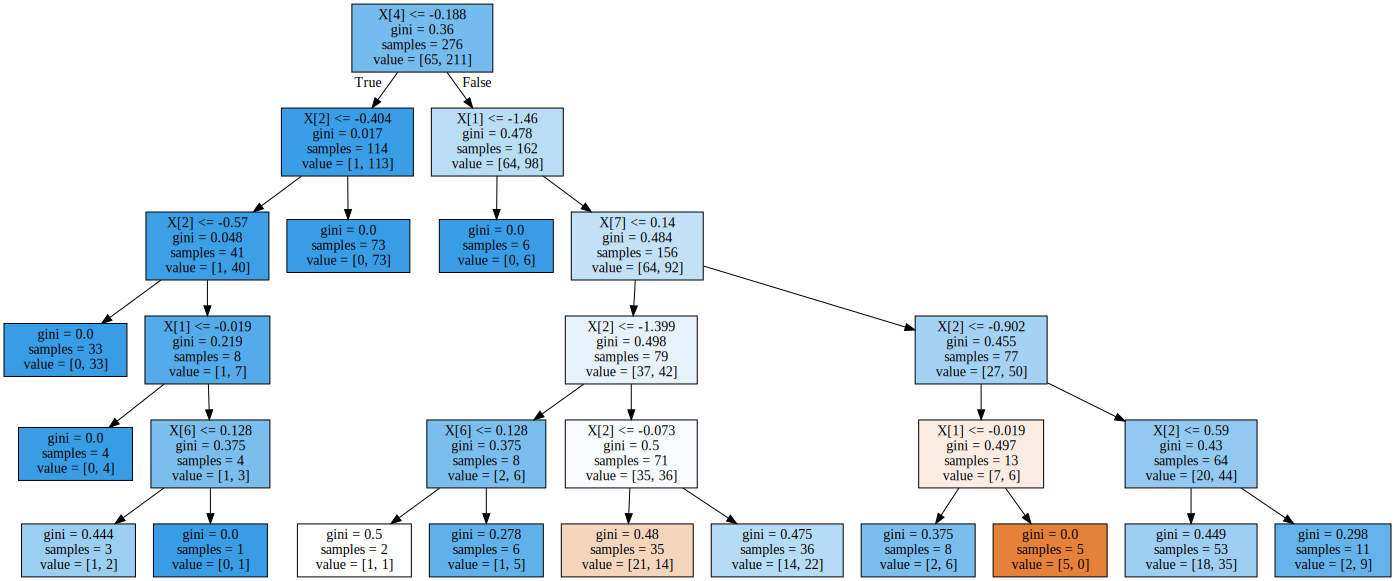

In [145]:
!pip install graphviz
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt,out_file=None,filled=True))


# Support Vector Machine

In [215]:
train_X,test_X,train_y,test_y = train_test_split(X_train2,y_train,test_size=0.2,random_state=9)

from sklearn.svm import SVC

svc= SVC(C=1,kernel= 'sigmoid',gamma='scale')
svc.fit(train_X, train_y)
y_pred_svc=svc.predict(test_X)
print(metrics.accuracy_score(test_y, y_pred_svc))


0.7857142857142857


# Logistic Regression

In [45]:
train_X,test_X,train_y,test_y = train_test_split(X_train2,y_train,test_size=0.2,random_state=4)
train_y1 = np.unique(train_y, return_inverse=True)[1].tolist()
test_y1 = np.unique(test_y, return_inverse=True)[1].tolist()

In [265]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l2',C=0.0001,solver='liblinear')
log.fit(train_X, train_y1)
y_pred_log=log.predict(test_X)
print(metrics.accuracy_score(test_y1, y_pred_log))
#y_pred_log

0.8142857142857143


# Model Evaluation using Test set

In [31]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Load Test set for evaluation 

In [266]:
#create test dataset and y label
test=X.where(X.flag=='Test').dropna()
testy=test['loan_status'].values
testx=test[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]
#Normalise the data
testx1= preprocessing.StandardScaler().fit(testx).transform(testx)
testx1[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [267]:
# get Jaccard and F1-score for Knn 

y_pred2 = knn.predict(testx1)

f1=f1_score(testy,y_pred2,average='weighted')
Jcq1=jaccard_similarity_score(testy,y_pred2)
lgls1= "NA"
knn_ev=[f1,Jcq1,lgls1]
knn_ev


[0.8022866154149418, 0.8333333333333334, 'NA']

In [268]:
# get Jaccard and F1-score for decision tree
y_pred_dt1=dt.predict(testx1)
f2=f1_score(testy,y_pred_dt1,average='weighted')
Jcq2=jaccard_similarity_score(testy,y_pred_dt1,normalize=True)
lgls2= "NA"
dt_ev=[f2,Jcq2,lgls2]
dt_ev


[0.7001989201477693, 0.7222222222222222, 'NA']

In [269]:
# get Jaccard and F1-score for SVM
y_pred_svc1=svc.predict(testx1)
f3=f1_score(testy,y_pred_svc1,average='weighted')
Jcq3=jaccard_similarity_score(testy,y_pred_svc1,normalize=True)
lgls3= "NA"
svc_ev=[f3,Jcq3,lgls3]
svc_ev
#y_pred_svc1


[0.6378600823045267, 0.7037037037037037, 'NA']

In [270]:
# get Jaccard and F1-score for logistic regression

testy1 = np.unique(testy, return_inverse=True)[1].tolist()
y_pred_log1=log.predict(testx1)
f4=f1_score(testy1,y_pred_log1,average='weighted')
Jcq4=jaccard_similarity_score(testy1,y_pred_log1,normalize=True)

y_pred_log2 = log.predict_proba(testx1)
lgls4= log_loss(testy1,y_pred_log2)
log_ev=[f4,Jcq4,lgls4]
log_ev
#y_pred_log1

[0.6717642373556352, 0.7592592592592593, 0.6906632110131702]

In [271]:
report = pd.DataFrame({'Algorithm':['KNN','Decision Tree','SVM','Logistic Regression'],'F1 Score':[f1,f2,f3,f4], 'Jaccard':[Jcq1,Jcq2,Jcq3,Jcq4],
                      'Logloss':[lgls1,lgls2,lgls3,lgls4]})
report

,Algorithm,F1 Score,Jaccard,Logloss
0,KNN,0.802287,0.833333,NA
1,Decision Tree,0.700199,0.722222,NA
2,SVM,0.637860,0.703704,NA
3,Logistic Regression,0.671764,0.759259,0.690663


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>